In [1]:
!pip install transformers==4.25.1
!pip install pytorch-lightning==1.6.4
!pip install timm==0.5.4
!pip install gradio
!pip install donut-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 20.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.25.1 which is incompatible.
Requested pytorch-lightning==1.6.4 from https://files.pythonhosted.org/packages/79/f9/37f4fd369652a80a1def12ce5af44be93

In [2]:
import argparse
import gradio as gr
import torch
from PIL import Image

from donut import DonutModel

In [3]:
def demo_process_vqa(input_img, question):
    global pretrained_model, task_prompt, task_name
    input_img = Image.fromarray(input_img)
    user_prompt = task_prompt.replace("{user_input}", question)
    output = pretrained_model.inference(input_img, prompt=user_prompt)["predictions"][0]
    return output


def demo_process(input_img):
    global pretrained_model, task_prompt, task_name
    input_img = Image.fromarray(input_img)
    output = pretrained_model.inference(image=input_img, prompt=task_prompt)["predictions"][0]
    return output

In [4]:
parser = argparse.ArgumentParser()
parser.add_argument("--task", type=str, default="cord-v2")
parser.add_argument("--pretrained_path", type=str, default="naver-clova-ix/donut-base-finetuned-cord-v2")
args, left_argv = parser.parse_known_args()

task_name = args.task
if "docvqa" == task_name:
    task_prompt = "<s_docvqa><s_question>{user_input}</s_question><s_answer>"
else:  # rvlcdip, cord, ...
    task_prompt = f"<s_{task_name}>"

pretrained_model = DonutModel.from_pretrained(args.pretrained_path)

if torch.cuda.is_available():
    pretrained_model.half()
    device = torch.device("cuda")
    pretrained_model.to(device)
else:
    pretrained_model.encoder.to(torch.bfloat16)

pretrained_model.eval()

demo = gr.Interface(
    fn=demo_process_vqa if task_name == "docvqa" else demo_process,
    inputs=["image", "text"] if task_name == "docvqa" else "image",
    outputs="json",
    title=f"Donut 🍩 demonstration for `{task_name}` task",
)
demo.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/404 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/859M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cp

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/335 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://e6aa021eeecf84c7d4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://e6aa021eeecf84c7d4.gradio.live


In [20]:
import matplotlib.pyplot as plt
def display_image_in_actual_size(im_path, title):

    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.title(title)

    plt.show()

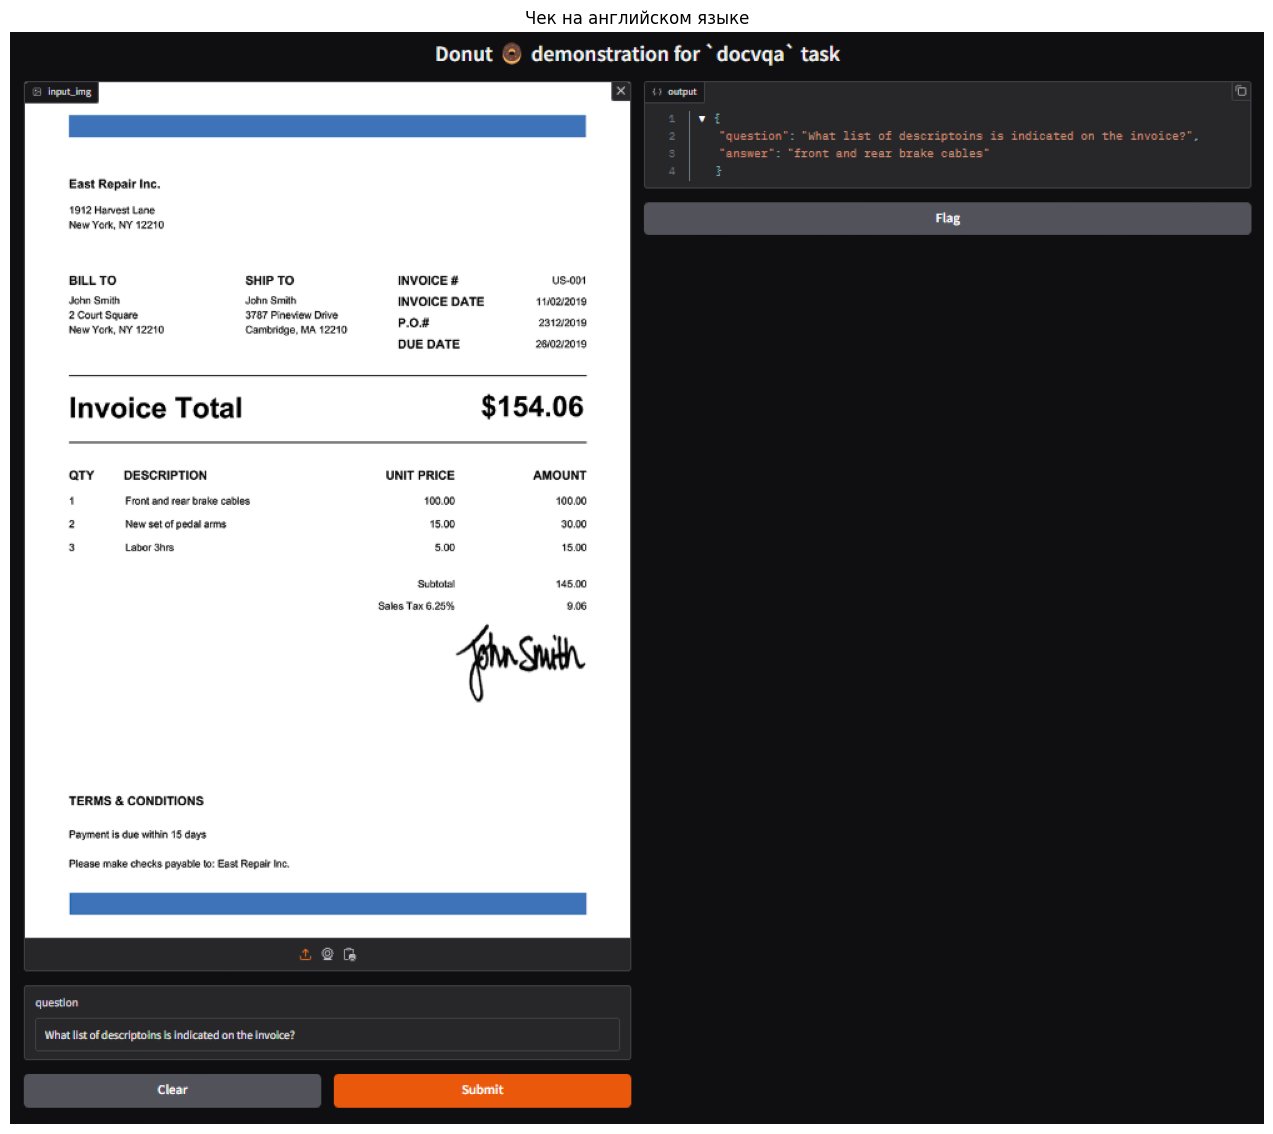

In [21]:
display_image_in_actual_size('/content/donut_docqa_test3_en_invoice.png', title='Чек на английском языке')